In [1]:
from qiskit import *
from qiskit import Aer, transpile
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.providers.ibmq import least_busy
from qiskit.extensions import Initialize
import qiskit.tools.jupyter

from math import sqrt, pi
from latex import *
%matplotlib inline

> I think I can safely say that nobody understands quantum mechanics … Do not keep saying to yourself, if you can possibly avoid it, “But how can it be like that?” because you will get “down the drain”, into a blind alley from which nobody has yet escaped. Nobody knows how it can be like that.
>
> -- <cite>Richard Feynman</cite>

 * Computers and aliens
 * Compute to find out something about the world

<img src="https://quantum.country/assets/Africa_Europe_by_land.jpg" />

From [[1]](#references)

<img src="https://quantum.country/assets/Africa_Europe_by_sea.jpg" />

> Nature isn’t classical dammit, and if you want to make a simulation of Nature you better make it quantum mechanical, and by golly it’s a wonderful problem because it doesn’t look so easy.
>
> -- <cite>Richard Feynman</cite>

Quantum Computers - advantage over classical computers - can efficiently simulate quantium mechanical processes

# Short intro to Quantum Computing by Daniel Steger

* A quick-and-dirty intro Qubits 
* Quantum circuits using Qiskit
* Quantum teleportation
* Grover's algorithm
* Execution on IBM's quantum computer

# Qubits

## Base states [[2]](#references)

$$
\begin{align}
  |0 \rangle \equiv \begin{bmatrix} 1\\ 0 \end{bmatrix} \qquad  |1 \rangle \equiv \begin{bmatrix} 0\\ 1 \end{bmatrix}
\end{align}
$$

__Postulate 1:__ Associated to any isolated physical system is a complex vector space
with inner product (that is, a Hilbert space) known as the state space of the
system. The system is completely described by its state vector, which is a unit
vector in the system’s state space.

## Wavefunction for a generic qubit

$$
\begin{align}
  |\psi \rangle = \alpha |0 \rangle + \beta |1 \rangle \qquad \alpha, \beta \in \mathbb{C} 
\end{align}
$$

<br/>

$$
\begin{align}  
  \langle \psi | \psi \rangle = \begin{bmatrix} \alpha & \beta \end{bmatrix} \begin{bmatrix} \alpha\\ \beta \end{bmatrix} = \alpha^2 + \beta^2 = 1
\end{align}
$$

<br/>

$$
\begin{align}
Norm: \Arrowvert \langle \psi | \psi \rangle\Arrowvert  = \sqrt{\alpha^2 + \beta^2} = 1
\end{align}
$$

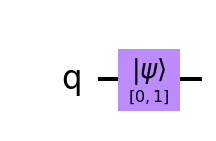

In [2]:
qc = QuantumCircuit(1)           # Create a quantum circuit with one qubit
initial_state = [0,1]            # Define initial_state as |1>
qc.initialize(initial_state, 0)  # Apply initialisation operation to the 0th qubit
qc.draw('mpl', scale=2)          # Let's view our circuit

## Init and run a state vector simulator

In [3]:
statevec_sim = Aer.get_backend("statevector_simulator")
job = execute(qc, backend=statevec_sim)
result = job.result()
statevec = result.get_statevector()
display(Math(vector_to_latex(statevec, pretext="|\\psi\\rangle =")))

<IPython.core.display.Math object>

## Run on an ideal Quantum simulator

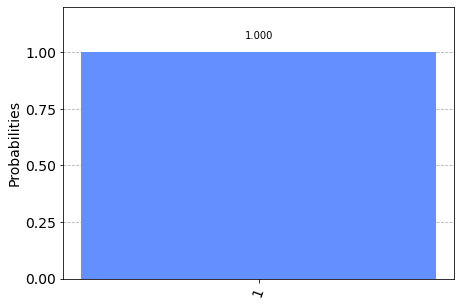

In [4]:
qasm_sim = Aer.get_backend("qasm_simulator")
qc.measure_all()                # Measure all qubits
qasm_job = execute(qc, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram(counts)

# Interesting qubits

$$
|+\rangle = \tfrac{(|0\rangle + |1\rangle)}{\sqrt{2}} \qquad |-\rangle = \tfrac{(|0\rangle - |1\rangle)}{\sqrt{2}}
$$

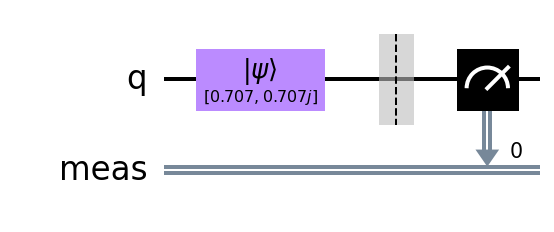

In [5]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.draw('mpl', scale=2)

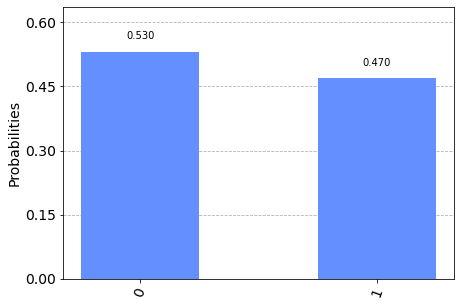

In [8]:
qasm_sim = Aer.get_backend("qasm_simulator")
qasm_job = execute(qc, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram(counts)

# Bloch sphere

In [ ]:
from kaleidoscope.interactive import bloch_sphere

def toBloch(matrix):
    [[a, b], [c, d]] = matrix
    x = complex(c + b).real
    y = complex(c - b).imag
    z = complex(a - d).real
    return x, y, z

qc = QuantumCircuit(1)

rho = qi.DensityMatrix.from_instruction(qc)
bloch_sphere(toBloch(rho.data), vectors_annotation=True)

# Qubit gates

__Postulate 2:__ The evolution of a closed quantum system is described by a unitary
transformation. That is, the state |ψ> of the system at time t1 is related to the
state |ψ'> of the system at time t2 by a unitary operator U which depends only on
the times t1 and t2,

## Pauli gates

$$
\begin{align}
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \qquad  Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \qquad 
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} 
\end{align}
$$

### Applying a gate to a qubit

$$
\begin{align}
 X | 1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0\\ 1 \end{bmatrix} = \begin{bmatrix} 1\\ 0 \end{bmatrix} = | 0\rangle
\end{align}
$$

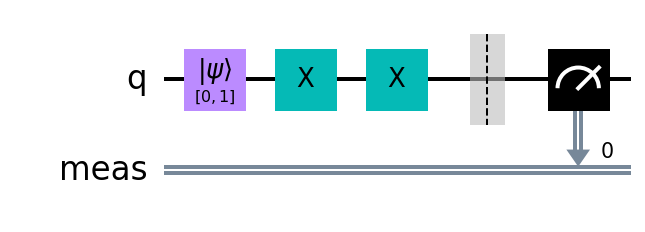

In [9]:
qc = QuantumCircuit(1)           
initial_state = [0,1]           
qc.initialize(initial_state, 0)
qc.x(0)
qc.x(0)
qc.measure_all()            
qc.draw('mpl', scale=2)

In [10]:
qasm_sim = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=statevec_sim)
result = job.result()
statevec = result.get_statevector()
display(Math(vector_to_latex(statevec, pretext="|\\psi\\rangle =")))

<IPython.core.display.Math object>

## Hadamard gate
$$
\begin{align}
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{align}
$$

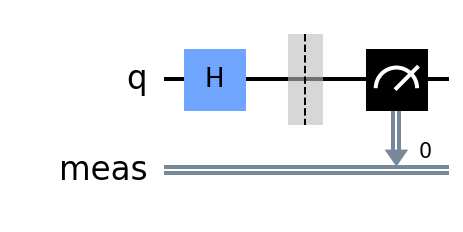

In [11]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl', scale=2)

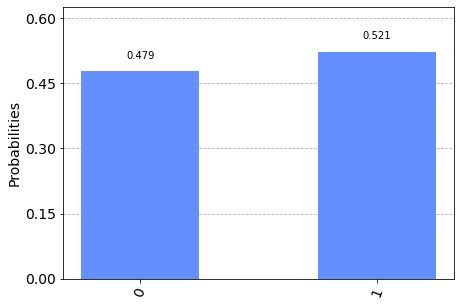

In [12]:
qasm_sim = Aer.get_backend("qasm_simulator")
qasm_job = execute(qc, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram(counts)

## CNOT Gate

| $c_{in}$ | $t_{in}$ | $c_{out}$ | $t_{out}$ |
|-------:|-------:|--------:|--------:|
| $|0\rangle$ | $|0\rangle$ | $|0\rangle$ | $|0\rangle$ |
| $|0\rangle$ | $|1\rangle$ | $|0\rangle$ | $|1\rangle$ |
| $|1\rangle$ | $|0\rangle$ | $|1\rangle$ | $\mathbf{|1\rangle}$ |
| $|1\rangle$ | $|1\rangle$ | $|1\rangle$ | $\mathbf{|0\rangle}$ |



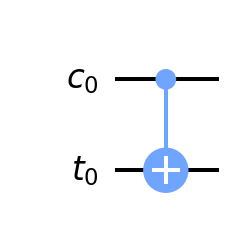

In [13]:
c = QuantumRegister(1, 'c')
t = QuantumRegister(1, 't')
qc = QuantumCircuit(c, t)
qc.cx(c, t)
qc.draw('mpl', scale=2)

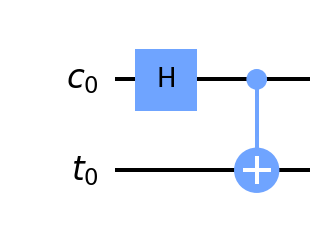

In [14]:
c = QuantumRegister(1, 'c')
t = QuantumRegister(1, 't')
qc = QuantumCircuit(c, t)
qc.h(c)
qc.cx(c, t)
qc.draw('mpl', scale=2) 

In [15]:
job = execute(qc, backend=statevec_sim)
result = job.result()
statevec = result.get_statevector()
display(Math(vector_to_latex(statevec, pretext="|\\psi\\rangle =")))

<IPython.core.display.Math object>

### Bell state (EPR Pair)
$$
CNOT|+0\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} = |\Phi^+\rangle
$$

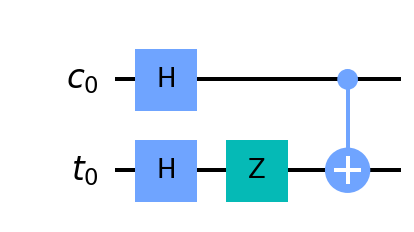

In [16]:
c = QuantumRegister(1, 'c')
t = QuantumRegister(1, 't')
qc = QuantumCircuit(c, t)
qc.h(c)
qc.h(t)
qc.z(t)
qc.cx(c, t)
qc.draw('mpl', scale=2) 

In [17]:
statevec_sim = Aer.get_backend("statevector_simulator")
job = execute(qc, backend=statevec_sim)
result = job.result()
statevec = result.get_statevector()
display(Math(vector_to_latex(statevec, pretext="|\\psi\\rangle =")))

<IPython.core.display.Math object>

$$
CNOT|+-\rangle = \frac{|00\rangle - |01\rangle - |10\rangle + |11\rangle}{2} = |--\rangle
$$

## Toffoli Gate

| $c_{in1}$ | $c_{in1}$ | $t_{in}$ | $c_{out1}$ | $c_{out2}$ |$t_{out}$ |
|----------:|----------:|---------:|-----------:|-----------:|---------:|
| $|0\rangle$ | $|0\rangle$ | $|0\rangle$ | $|0\rangle$ | $|0\rangle$ | $|0\rangle$ |
| $|0\rangle$ | $|1\rangle$ | $|0\rangle$ | $|0\rangle$ | $|1\rangle$ | $|0\rangle$ |
| $|1\rangle$ | $|0\rangle$ | $|0\rangle$ | $|1\rangle$ | $|0\rangle$ | $|0\rangle$ |
| $|1\rangle$ | $|1\rangle$ | $|0\rangle$ | $|1\rangle$ | $|1\rangle$ | $\mathbf{|1\rangle}$ |

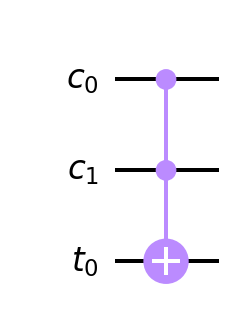

In [18]:
c = QuantumRegister(2, 'c')
t = QuantumRegister(1, 't')
qc = QuantumCircuit(c, t)
qc.ccx(c[0], c[1], t)
qc.draw('mpl', scale=2)

## Universal gates

What is a set of gates to construct __any__ circuit from?

 * Classical gates: NAND is universal
 * Quantum gates: Hadamard, Phase (Z-Gate with $-1$ replaced by $i$), CNOT, and Toffoli (or $\pi/8$ gate) are universal

# Quantum teleportation

Alice shared an EPR pair with Bob some time ago. Bob is in hiding and Alice got the mission to send a secret message in form of a qubit $ |\psi \rangle = \alpha |0 \rangle + \beta |1 \rangle$ to Bob.

She cannot copy the qubit like a classical bit. She cannot know the internal state of $|\psi\rangle$. The only thing she can do is send classical information.

## Setup

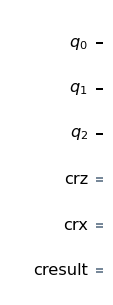

In [20]:
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
cresult = ClassicalRegister(1, name="cresult")
teleportation_circuit = QuantumCircuit(qr, crz, crx, cresult)
teleportation_circuit.draw('mpl')

## Step 1 

Create the EPR pair in qubits $|q_1\rangle$ and $|q_2\rangle$.

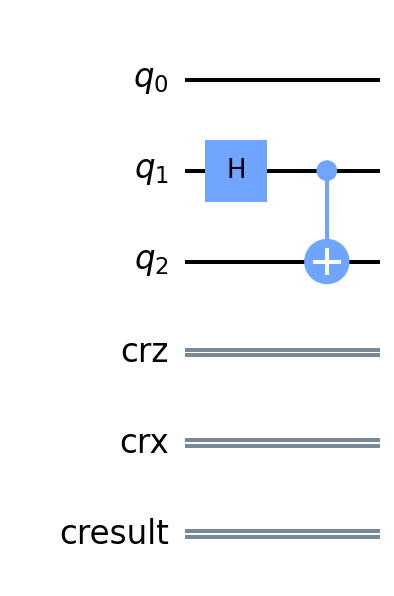

In [21]:
teleportation_circuit.h(qr[1])
teleportation_circuit.cx(qr[1], qr[2])
# And view the circuit so far:
teleportation_circuit.draw('mpl', scale=2)

## Step 2

Alice interacts with $|\psi\rangle$ and her half EPR.

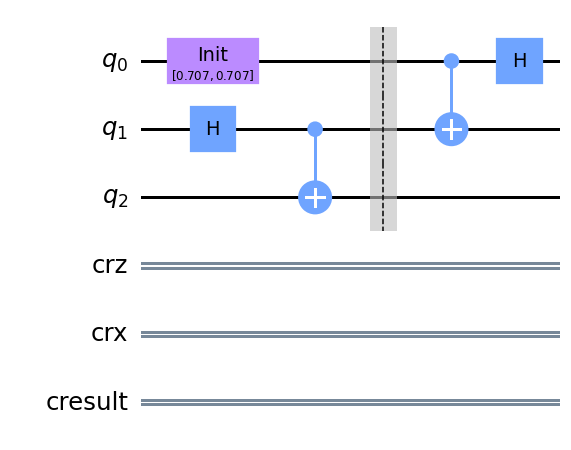

In [22]:
psi = [1/sqrt(2), 1/sqrt(2)]           
init_gate = Initialize(psi)
init_gate.label = "init"

teleportation_circuit.append(init_gate, [qr[0]])
teleportation_circuit.barrier()
teleportation_circuit.cx(qr[0], qr[1])
teleportation_circuit.h(qr[0])
teleportation_circuit.draw('mpl', scale=1.5)

## Step 3

Alice measures $|q_0\rangle$ and $|q_1\rangle$ and sends the infos to Bob.

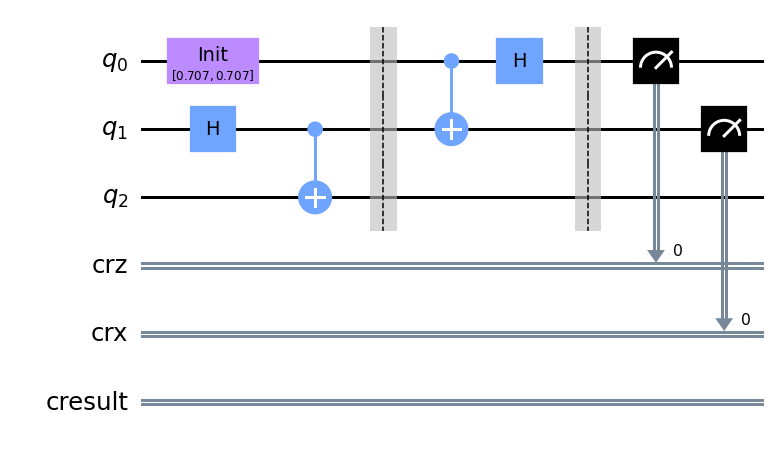

In [23]:
teleportation_circuit.barrier()
teleportation_circuit.measure(qr[0], crz)
teleportation_circuit.measure(qr[1], crx)
teleportation_circuit.draw('mpl', scale=1.5)

## Step 4

Bob applies the classical bits in 4 different ways:
* $00$ $\rightarrow$  Do nothing
* $01$ $\rightarrow$  Apply $X$-Gate
* $10$ $\rightarrow$  Apply $Z$-Gate
* $11$ $\rightarrow$  Apply $ZX$-Gates

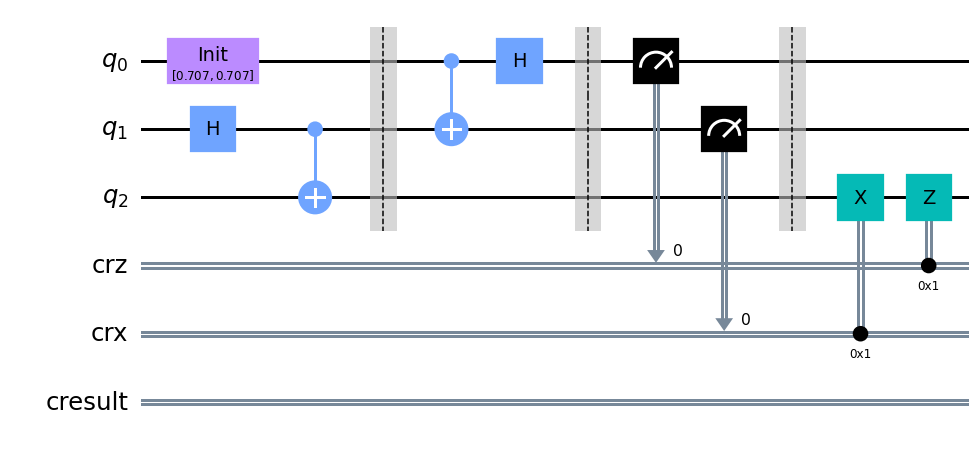

In [24]:
teleportation_circuit.barrier()
teleportation_circuit.x(qr[2]).c_if(crx, 1) # Apply gates if the registers 
teleportation_circuit.z(qr[2]).c_if(crz, 1) # are in the state '1'
teleportation_circuit.draw('mpl', scale=1.5)

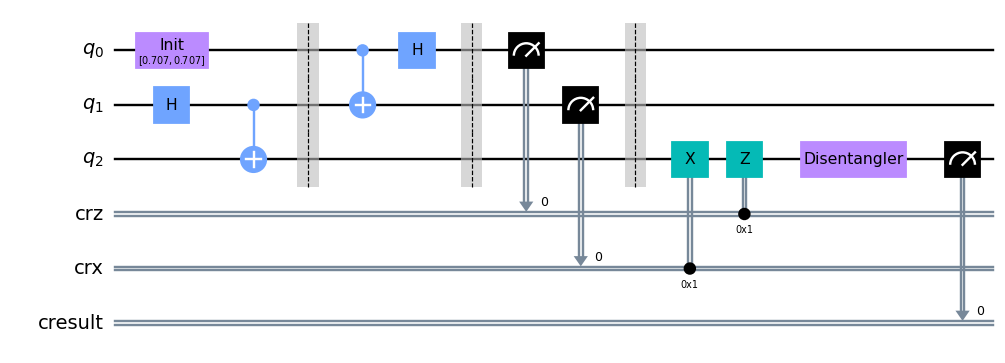

In [25]:
deentangle = init_gate.gates_to_uncompute()
teleportation_circuit.append(deentangle, [qr[2]])
teleportation_circuit.measure(qr[2], cresult)
teleportation_circuit.draw('mpl', scale=1.2)

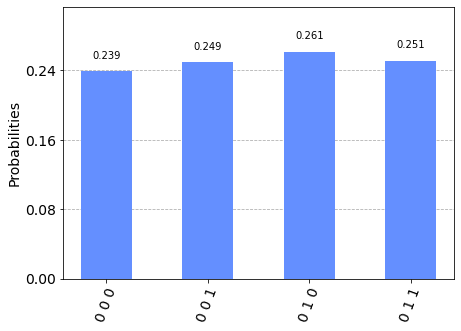

In [29]:
qasm_sim = Aer.get_backend("qasm_simulator")
qasm_job = execute(teleportation_circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram(counts)

## Grover's algorithm [[3]](#references)

Search for $w$ in an unsorted database of size $2^n$.

An oracle tells us if we have found the respective result:

$$
O|x\rangle = \begin{cases}
   &|x\rangle & x \neq w\\
   -&|x\rangle & x = w
    \end{cases}
$$

1. Init all qubits by applying a Hadamard gate

![Grover 1](grover1.png "image Title")

2. Apply the oracle $O$

![Grover 2](grover2.png "image Title")

3. Diffuse by reflecting $U = 2|s\rangle \langle s| - I$ with Hadamard gates

![Grover 3](grover3.png "image Title")


Apply the grover iteration about $\frac{\pi}{4}\sqrt{N}$ times and measure the output.

In [30]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc 

## Task: find 3-bit combinationen which are palindromes:

States:

<table>
  <tr>
    <td>
        $V_0$
      </td>
      <td>
        $V_1$
      </td>
      <td>
        $V_2$
      </td>
   </tr>
 </table>


Conditions:

$$
\begin{align}
 V_0 & =  V_2\\
 V_1 & =  1
\end{align}
$$

## Building a XOR gate and negate it

In [32]:
def NOTXOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
    qc.x(output)

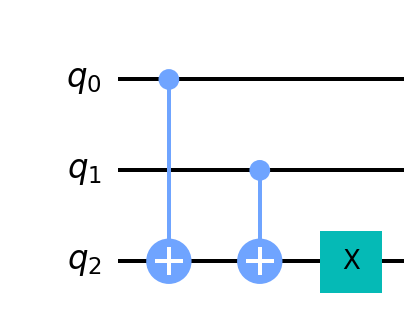

In [33]:
qc = QuantumCircuit(3)
NOTXOR(qc, 0, 1, 2)
qc.draw('mpl', scale=2)

## Building the Oracle $O$

In [35]:
def pali_oracle():
    var_qubits = QuantumRegister(3, name='v')     # variable bits
    clause_qubits = QuantumRegister(1, name='c')  # bits to store clause-checks
    output_qubit = QuantumRegister(1, name='out')
    #cbits = ClassicalRegister(3, name='cbits')
    qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit) # Create quantum circuit

    # Compute clauses
    NOTXOR(qc, var_qubits[0], var_qubits[2], clause_qubits[0])

    # Flip 'output' bit if all clauses are satisfied
    qc.ccx(clause_qubits[0], var_qubits[1], output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    NOTXOR(qc, var_qubits[0], var_qubits[2], clause_qubits[0])
    O_s = qc.to_gate()
    O_s.name = "O"
    return O_s
    
#pali_oracle().draw('mpl', scale=1.5)

## Building the Diffusor $U$

In [36]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U"
    return U_s

#diffuser(3).draw('mpl', scale=1.5)

## Putting the algorithm together

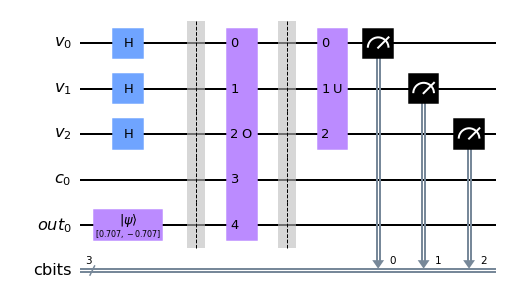

In [42]:
var_qubits = QuantumRegister(3, name='v')
clause_qubits = QuantumRegister(1, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(3, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |-> or do HX
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
qc.append(pali_oracle(), [0,1,2,3,4])
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(3), [0,1,2])

## Second Iteration
#qc.append(pali_oracle(), [0,1,2,3,4])
#qc.barrier()  # for visual separation
# Apply our diffuser
#qc.append(diffuser(3), [0,1,2])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw('mpl', fold=-1)

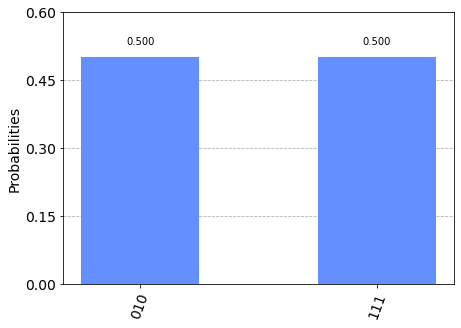

In [43]:
qasm_sim = Aer.get_backend("qasm_simulator")
qasm_job = execute(qc, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram(counts)

# Execution on a real quantum computer

In [44]:
# Load IBM provider
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
provider.backends() 

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [45]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [46]:
backend = provider.get_backend('ibmq_quito')
backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [48]:
coupling_map = backend.configuration().coupling_map
print(coupling_map)

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


In [49]:
layout = {0: var_qubits[0], 1: clause_qubits[0], 2: var_qubits[2], 3: var_qubits[1], 4: output_qubit[0]}

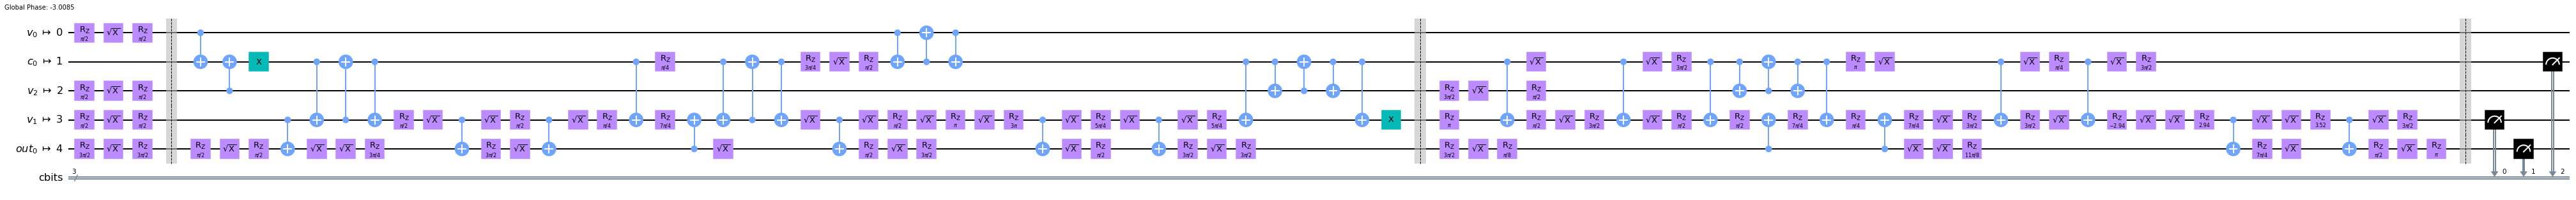

In [52]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(qc, backend, initial_layout=layout, optimization_level=3)
transpiled_grover_circuit.draw('mpl', fold=1)

In [53]:
job = backend.run(transpiled_grover_circuit, shots=8192)
job_monitor(job, interval=2)

Job Status: job has successfully run


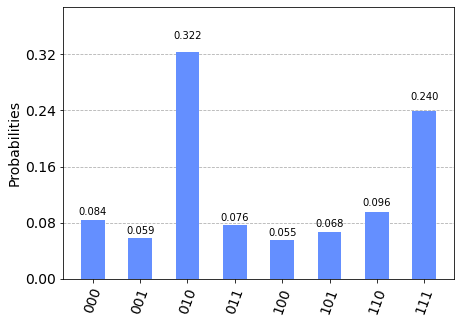

In [54]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)

|Technology            |       |  # Qubits | Company / Website |
|----------------------|-------| ---------:|:------------------|
| Superconducting Josephson Junctions (circuit QED) | <img src="https://qiskit.org/images/landing-page/feature-hardware.jpg" width="150px" />       |       65 | [IBM quantum-computing](https://quantum-computing.ibm.com)    |
| Superconducting Josephson Junctions (circuit QED) | <img src="https://www.rigetti.com/img/rigetti-chip.31d17ff7.png" width="150px" />     |        31 | [Rigetti](https://www.rigetti.com)           |
| Superconducting Josephson Junctions (circuit QED) | <img src="https://quantumai.google/site-assets/images/marketing/hardware/hardware-chips-sycamore.jpg" width="150px" />       |       54 | [Google Sycamore](https://quantumai.google/hardware/datasheet/weber.pdf)    |
| Trapped ion system (Ytterbium ions)   | <img src="https://ionq.com/static/63c08566b7772d8ac96a106dd345e1fa/0e6e2/box.png" width="150px" /> | 11 (32) | [IONQ](https://ionq.com/technology) |
| Trapped ion system   | <img src="https://www.honeywell.com/content/dam/honeywellbt/en/images/content-images/news/article-banners/hon-ab-Quantum-Solutions.jpg" width="150px" /> | 10  | [Honeywell](https://www.honeywell.com) |
| Adiabatic quantum computing using Josephson Junctions | <img src="https://www.dwavesys.com/sites/default/files/video-images/dwave-img.jpg" width="150px" /> | 5640 | [D-WAVE Advantage](https://www.dwavesys.com) |
| Quantum analog computing (at room temperature)| <img src="https://static.wixstatic.com/media/636629_8cfcbb3d91d3423fa42ea35f3d845885~mv2.png/v1/fill/w_424,h_264,al_c,usm_0.66_1.00_0.01/IQ%20logo%20white.png" width="150px" style="background-color: rgb(42,146,169);" /> | ?? | [infinityq](https://www.infinityq.tech/research) |
| Silicone photonics quantum computer | $\large\Psi$ | 1 Mio | [PsiQuantum](https://psiquantum.com) |

## Quantum supremacy

1. Find a proof for a problem which has superpolinomial speedup compared to a classical algorithm 
2. Build a quantum computer which can solve the problem with the expected performance

## Quantum advantage

* Implement a real world problem with superpolinomial speedup compared to a classical computer 

# Summary

<img src="https://quantum.country/assets/strange_loop.png" />

From [[1]](#references)

<a id='references'></a>
# Bibliography 

1. Andy Matuschak and Michael A. Nielsen, “Quantum Computing for the Very Curious”, (https://quantum.country/qcvc), San Francisco (2019).
2. Qiskit, “Representing Qubit States” (https://qiskit.org/textbook/ch-states/representing-qubit-states.html), IBM 2021.
3. Qiskit, “Grover's algorithm” (https://qiskit.org/textbook/ch-algorithms/grover.html), IBM 2021.
4. Michael A. Nielsen & Isaac L. Chuang, “[Quantum Computation and Quantum Information](https://en.wikipedia.org/wiki/Quantum_Computation_and_Quantum_Information)", Cambridge 2010.
5. M. A. Nielsen, E. Knill, R. Laflamme, “Complete quantum teleportation using nuclear magnetic resonance”, (https://arxiv.org/abs/quant-ph/9811020), Nature vol 395, 5 November 1998.

6. CS 269Q: Stanford Course on Quantum Computing, (https://cs269q.stanford.edu/index.html), 2019
7. Philip Krantz, Morten Kjaergaard, Fei Yan, Terry P. Orlando, Simon Gustavsson, William D. Oliver, “A Quantum Engineer's Guide to Superconducting Qubits”, (https://arxiv.org/abs/1904.06560), Applied Physics Reviews 6, 021318 (2019)
8. John Preskill, “Quantum Computing in the NISQ era and beyond”, (https://arxiv.org/abs/1801.00862), Quantum 2, 79 (2018)
9. Qiskit Online Course, (https://qiskit.org/learn/intro-qc-qh), IBM 2021
10. Andy Matuschak and Michael A. Nielsen, “Quantum Mechanics Distilled”, (https://quantum.country/qm), San Francisco (2020).
11. J. J. Sakurai, Jim Napolitano, “Modern Quantum Mechanics”, (https://doi.org/10.1017/9781108499996), Cambridge 2018.
12. Von Aristoteles zur Stringtheorie, (https://www.youtube.com/playlist?list=PLmDf0YliVUvGGAE-3CbIEoJM3DJHAaRzj)

# Notebook on GitHub

(https://github.com/toliman7/quantum_computing)